<a href="https://colab.research.google.com/github/poorya-abbasi/DL-HW01/blob/main/DL_HW01_3Layers_Poorya_Abbasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 27.5MB/s]


In [3]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [6]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
print(df.shape)

(480, 17)


In [8]:
# Converting Categorical values to scaler values
le = LabelEncoder()
# Replacing H with M to make the choice scaler between 0 and 1
df['Class'] = df['Class'].replace('H','M')
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [9]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,1


In [10]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])


In [11]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [12]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)

Number of dataset:  480
Number of train set:  384
Number of validation set:  96
Shape of X_train (384, 16)
Shape of y_train (384,)


# ***Implementing Model***

In [97]:
class Network(object):
  def __init__(self):        
        #Setting Up Random Generator
        rg = np.random.default_rng()
        #Setting Parameters
        self.inputNeuoronCount = X_train.shape[1]
        self.hiddenLayerNeuronCount = 32
        self.outputNeuoronCount = 1
        self.iterations = 1000
        self.l_rate = 0.001
        #Setting Up Weights
        self.weights = rg.random((self.inputNeuoronCount, self.hiddenLayerNeuronCount))
        self.weights2 = rg.random((self.hiddenLayerNeuronCount, self.outputNeuoronCount))
        self.bias = rg.random((self.hiddenLayerNeuronCount,1))
        self.bias2 = rg.random((self.outputNeuoronCount,1))
        print("Weights : ",self.weights.shape)
        print("Bias : ",self.bias.shape)
        print("Weights Hidden Layer : ",self.weights2.shape)
        print("Bias Hidden Layer : ",self.bias2.shape)

  #Activation Function
  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def relu(self,z):
    return np.maximum(0,z)

  def dRelu(self,x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

  def propagation(self):
    self.cost = 0.0
    self.accuracy = 0.0
    self.dew = 0.0
    self.deb = 0.0
    self.hiddenDew = 0.0
    self.hiddenDeb = 0.0
    self.outputDew = 0.0
    self.outputDeb = 0.0
    for i in range(X_train.shape[0]):
      #Matrix Multiplication
      z = np.dot(self.weights.T,X_train[i].reshape(16,1))+self.bias
      #Invoking Activation Function
      a = self.relu(z)
      #Matrix Multiplication For Hidden Layer
      z2 = np.dot(self.weights2.T,a)+self.bias2
      a2 = self.sigmoid(z2)
      #Calculating Cost
      self.cost += y_train[i]*np.log(a2[0]+0.000001) + (1-y_train[i])*np.log(1-a2[0]+0.000001)
      #Calculating Acccuracy
      self.accuracy += np.abs(a2[0][0]- y_train[i])
      #Calculating D(e)/D(b)
      dz2 =a2-y_train[i]
      self.outputDew += np.dot(a, dz2.T) 
      self.outputDeb += dz2
      da1 = np.dot(self.weights2,dz2.T) 
      dz1= da1*self.dRelu(z)
      self.hiddenDew+=np.dot(X_train[i].reshape(16,1), dz1.T) 
      self.hiddenDeb += dz1
    #Matching the values with the propper formulas
    self.cost /= X_train.shape[0]*-1
    self.accuracy = (100 - self.accuracy/X_train.shape[0] * 100)
    self.outputDew/=X_train.shape[0]
    self.outputDeb/=X_train.shape[0]
    return self.cost, self.hiddenDew, self.hiddenDeb, self.outputDew, self.outputDeb, self.accuracy

  #Gradient Descent
  def gDescent(self):
    costList = list()
    accuracyList = list()
    for i in range(self.iterations):
      cost, dw1,db1,dw2,db2, accuracy = self.propagation()
      self.weights -= self.l_rate * (dw1 + ((0.1/(2*X_train.shape[0]))*np.sum(self.weights)))
      self.bias -= self.l_rate * db1        
      self.weights2 -= self.l_rate * (dw2 + ((0.1/(2*X_train.shape[0]))*np.sum(self.weights)))
      self.bias2 -= self.l_rate * db2   
      if (i + 1) % 100 == 0:
          print ("Cost after iteration "+str(i+1)+" is "+str(cost[0]))
          print ("Accuracy after iteration "+str(i+1)+" is "+str(accuracy))
          costList.append(cost[0])
          accuracyList.append(accuracy)
    #Drawing Cost Per Iteration Graph
    plt.plot(costList)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
    #Drawing Accuracy Per Iteration Graph
    plt.plot(accuracyList)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()

      
  def predict(self):    
    predictions = np.zeros((X_val.shape[0],1))
    cost = 0.0
    accuracy = 0.0
    for i in range(X_val.shape[0]):
      z1 = np.dot(self.weights.T, X_val[i].reshape(16,1))+self.bias
      a1 = a = self.relu(z1)
      z2 = np.dot(self.weights2.T, a1)+self.bias2
      a = self.sigmoid(z2)
      if a < 0.5:
        predictions[i,0] = 0
      else :
        predictions[i,0] = 1
      cost += y_val[i]*np.log(a[0]+0.000001) + (1-y_val[i])*np.log(1-a[0]+0.000001)
      accuracy +=np.abs(a[0][0] - y_val[i])
    cost /= X_val.shape[0]*-1
    accuracy = (100 - accuracy/X_val.shape[0] * 100)
    return predictions, cost, accuracy

network = Network()

Weights :  (16, 32)
Bias :  (32, 1)
Weights Hidden Layer :  (32, 1)
Bias Hidden Layer :  (1, 1)


# ***Training the model***

Cost after iteration 100 is 0.35505444563430794
Accuracy after iteration 100 is 76.49873153056815
Cost after iteration 200 is 0.353240361931574
Accuracy after iteration 200 is 76.57207387796032
Cost after iteration 300 is 0.35131308202367845
Accuracy after iteration 300 is 76.68751563801209
Cost after iteration 400 is 0.3492928871887701
Accuracy after iteration 400 is 76.77095641634423
Cost after iteration 500 is 0.34708746931382956
Accuracy after iteration 500 is 76.89545895352471
Cost after iteration 600 is 0.3446542238794434
Accuracy after iteration 600 is 76.96297321845472
Cost after iteration 700 is 0.34185004430521526
Accuracy after iteration 700 is 77.08299030756761
Cost after iteration 800 is 0.338569375939973
Accuracy after iteration 800 is 77.34078521711551
Cost after iteration 900 is 0.33551366609787237
Accuracy after iteration 900 is 77.77485526339638
Cost after iteration 1000 is 0.33322168581796524
Accuracy after iteration 1000 is 78.22938412467086


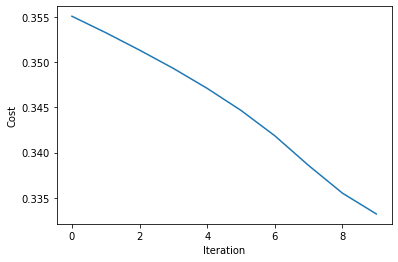

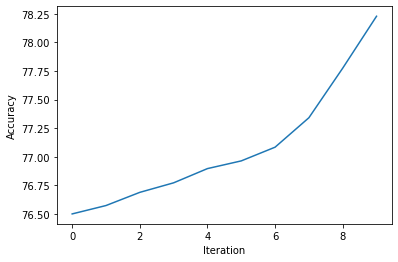

In [100]:
network.gDescent()

# ***Evaluating the model***

In [101]:
predictions, cost, accuracy = network.predict()
print("Final Cost : "+str(cost[0]))
print("Final Accuracy : "+str(accuracy) +"%")

Final Cost : 0.33991536571718844
Final Accuracy : 78.57668834786088%
